# Wavelength-Dependent Sensor Effects

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import scipy.interpolate
import scipy.integrate

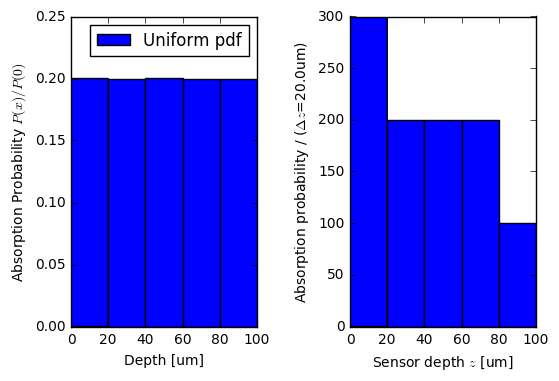

In [59]:
def calculate_depth_pdf(L=100., nx=5, ncdf=1000):
    
    # Initialize the table of results.
    cdf = (np.arange(ncdf) + 0.5) / ncdf
    
    # Create a grid of depths into the sensor.
    x_edges = np.linspace(0., L, nx + 1)
    x_centers = 0.5 * (x_edges[1:] + x_edges[:-1])
    # Put in a uniform probability distribution
    result = np.ones(nx)
    result /= np.sum(result)
    subplots_adjust(wspace = 0.5)
    subplot(1,2,1)
    plt.hist(x=x_centers, bins=x_edges, weights=result, label='Uniform pdf')
    plt.legend()
    plt.xlabel('Depth [um]')
    plt.ylabel('Absorption Probability $P(x)/P(0)$')

    output = np.interp(cdf, np.cumsum(result), x_centers)
    subplot(1,2,2)
    plt.hist(output, bins=x_edges)
    #plt.ylim(0.0,50.0)
    plt.xlabel('Sensor depth $z$ [um]')
    plt.ylabel('Absorption probability / ($\Delta z$={0:.1f}um)'.format(L / nx))


calculate_depth_pdf()

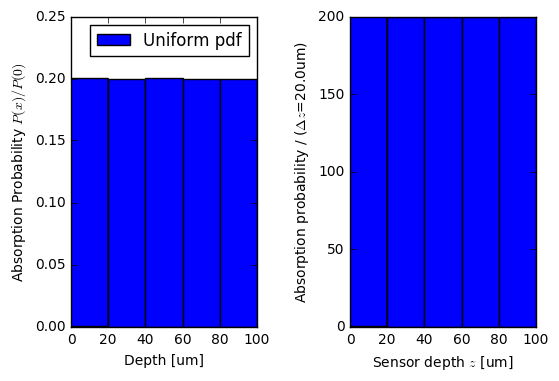

In [61]:
def calculate_depth_pdf_fixed(L=100., nx=5, ncdf=1000):
    
    # Initialize the table of results.
    cdf = (np.arange(ncdf) + 0.5) / ncdf
    
    # Create a grid of depths into the sensor.
    x_edges = np.linspace(0., L, nx + 1)
    x_centers = 0.5 * (x_edges[1:] + x_edges[:-1])
    # Put in a uniform probability distribution
    result = np.ones(nx)
    result /= np.sum(result)
    # Need to shift the cumulative sum over so that the
    # first point in the function you are interpolating is (0,0)
    # and the last point is (L, 1.0).  Then it interpolates
    # correctly.
    old_cumsum = np.cumsum(result)
    new_cumsum = np.insert(old_cumsum, 0, 0.0)

    subplots_adjust(wspace = 0.5)
    subplot(1,2,1)
    plt.hist(x=x_centers, bins=x_edges, weights=result, label='Uniform pdf')
    plt.legend()
    plt.xlabel('Depth [um]')
    plt.ylabel('Absorption Probability $P(x)/P(0)$')
    # Now interpolate with the values at x_edges instead of x_centers
    output = np.interp(cdf, new_cumsum, x_edges)
    subplot(1,2,2)
    plt.hist(output, bins=x_edges)
    #plt.ylim(0.0,50.0)
    plt.xlabel('Sensor depth $z$ [um]')
    plt.ylabel('Absorption probability / ($\Delta z$={0:.1f}um)'.format(L / nx))

calculate_depth_pdf_fixed()